In [1]:
import pandas as pd
import numpy as np

In [7]:
data=pd.read_csv("abalone1.csv",names=range(0,9),header=0)
data.head()
df=pd.DataFrame(data=data)
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

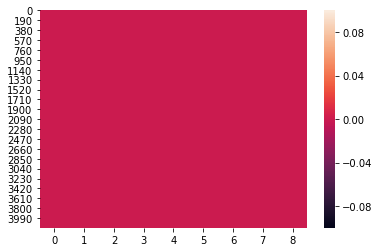

In [9]:
sns.heatmap(df.isnull())

{'whiskers': [<matplotlib.lines.Line2D at 0x21e9106cac8>,
 'caps': [<matplotlib.lines.Line2D at 0x21e9106cef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21e9106c668>],
 'medians': [<matplotlib.lines.Line2D at 0x21e9107e828>],
 'fliers': [<matplotlib.lines.Line2D at 0x21e9107eb70>],
 'means': []}

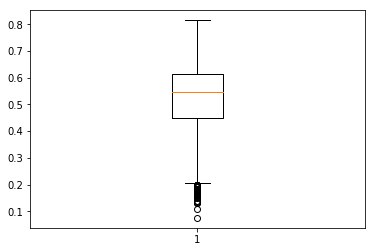

In [11]:
plt.boxplot(df[1])

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [14]:
df[0]=le.fit_transform(df[0])

In [15]:
df.head()

,0,1,2,3,4,5,6,7,8
0,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


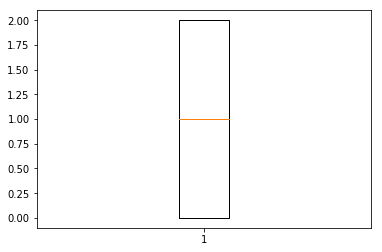

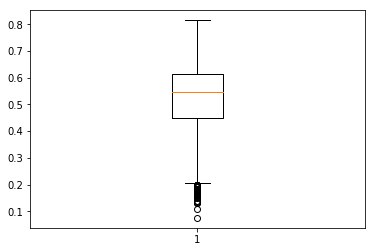

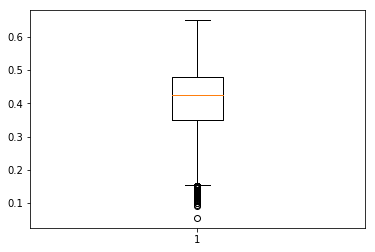

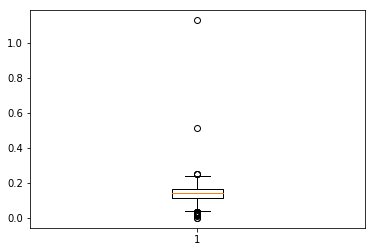

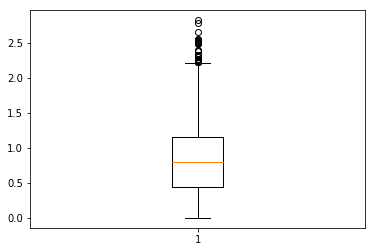

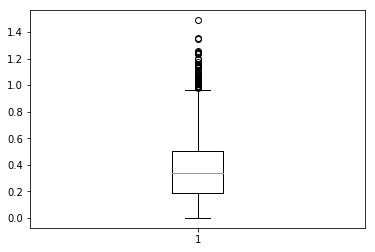

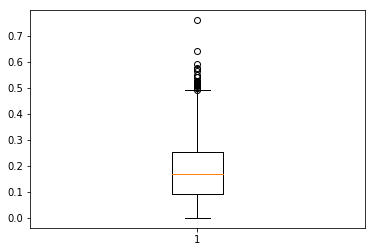

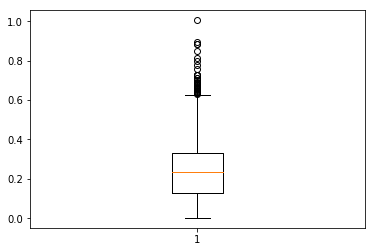

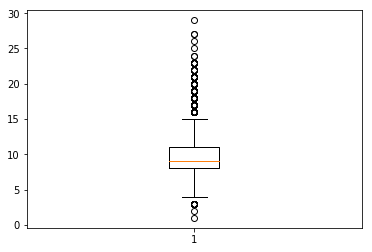

In [19]:
for i in range(0,9):
    plt.boxplot(df[i])
    plt.show()

In [20]:
from scipy.stats import zscore

In [21]:
z=np.abs(zscore(df))
threshold=3
df_new=df[(z<3).all(axis=1)]

In [22]:
df.shape

(4176, 9)

In [23]:
df_new.shape

(4026, 9)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [25]:
lr=LinearRegression()

In [27]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=47)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.5116280552456638

In [28]:
pred=lr.predict(x_test)
print(r2_score(y_test,pred))
print(mean_squared_error(y_test,pred))

0.5171214396986178
4.129798614176497


In [29]:
td=np.array([2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070])
td=td.reshape(1,-1)
lr.predict(td)

array([7.34966879])

In [30]:
lr.coef_

array([  0.07546432,  -2.51997203,  12.8259902 ,  22.74070093,
         6.02559718, -17.19747444,  -3.68625544,   7.99418691])

In [31]:
lr.intercept_

2.6067467235403248